## Análise dos dados do dataset

In [65]:
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown
from collections import Counter
from itertools import chain
from src.americanas.text.utils import token_and_remove_sw
from wordcloud import WordCloud
from nltk import word_tokenize

pd.set_option("display.max_rows", 15)
pd.set_option('display.max_columns',100)

In [40]:
df = pd.read_csv('../dataset/B2W-Reviews01.csv')

display(df.info(),df.sample())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132373 entries, 0 to 132372
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   submission_date        132373 non-null  object 
 1   reviewer_id            132373 non-null  object 
 2   product_id             132373 non-null  object 
 3   product_name           132289 non-null  object 
 4   product_brand          40982 non-null   object 
 5   site_category_lv1      132367 non-null  object 
 6   site_category_lv2      128360 non-null  object 
 7   review_title           132071 non-null  object 
 8   overall_rating         132373 non-null  int64  
 9   recommend_to_a_friend  132355 non-null  object 
 10  review_text            129098 non-null  object 
 11  reviewer_birth_year    126389 non-null  float64
 12  reviewer_gender        128237 non-null  object 
 13  reviewer_state         128382 non-null  object 
dtypes: float64(1), int64(1), object(12)


c:\Users\STEFA\Anaconda3\envs\apolo\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


None

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
24502,2018-01-19 08:33:54,f4120f4f8dd356065b9b13e37f54c4bed5d115daa0fe52...,129555980,Smartphone Asus Zenfone 3 Dual Chip Android 6 ...,asus,Celulares e Smartphones,Smartphone,10,4,Yes,"Ótimo produto, mt lindo. Ñ trava, self de pri...",1980.0,F,SP


In [41]:
df.dropna(subset=['review_title', 'overall_rating','recommend_to_a_friend','review_text','reviewer_birth_year'],inplace=True)
df['reviewer_birth_year'] = df['reviewer_birth_year'].astype('int')
df['recommend_to_a_friend_cat'] = df['recommend_to_a_friend'].map({'Yes':1,'No':0})

#Dados duplicados
display(df.duplicated().sum())
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)

824

## Gráficos

#### Distribuição do sexo dos usuários com relação a quantidade de avaliações

##### Neste gráfico nós vemos a distribuição do sexo dos usuários com relação a quantidade de avaliações boas ou ruins de um determinado produto. 

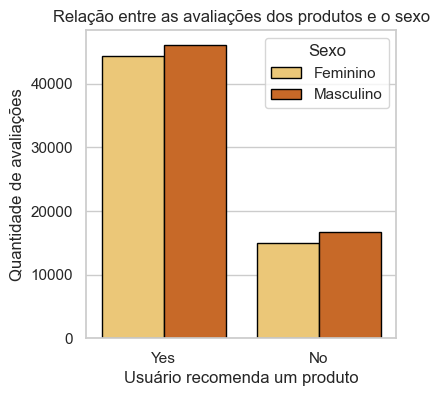

In [42]:
display(Markdown("##### Neste gráfico nós vemos a distribuição do sexo dos usuários com relação a quantidade de avaliações boas ou ruins de um determinado produto. "))
sns.set(style="whitegrid")
plt.figure(figsize=(4,4))
sns.countplot(x='recommend_to_a_friend', data = df, hue='reviewer_gender',palette='YlOrBr',edgecolor = "black")
plt.xlabel("Usuário recomenda um produto")
plt.ylabel("Quantidade de avaliações")
plt.title("Relação entre as avaliações dos produtos e o sexo")
plt.legend(title='Sexo', loc='upper right', labels=['Feminino', 'Masculino'])
plt.show()

#### Number of positive and negative reviews

In [43]:
data = df[df['recommend_to_a_friend']=='Yes']['product_name'].value_counts().to_frame().reset_index()
data.rename(columns={'index':'Product Name','product_name':'Number of positive reviews'},inplace=True)
display(data[0:15])

,Product Name,Number of positive reviews
0,Aspirador de Pó Philco Rapid 1000N Vermelho/Pr...,704
1,Smartphone Motorola Moto G 5S Dual Chip Androi...,677
2,Smartphone Samsung Galaxy J7 Metal Dual Chip A...,590
3,Smartphone Motorola Moto G 5S Dual Chip Androi...,469
4,Smartphone Samsung Galaxy J7 Prime Dual Chip A...,429
5,Smartphone Samsung Galaxy J5 Prime Dual Chip A...,421
6,"Smart TV LED 32"" Samsung 32J4300 HD com Conver...",401
7,Smartphone Moto G 5S Dual Chip Android 7.0 Tel...,367
8,Smartphone Samsung Galaxy J5 Pro Dual Chip And...,366
9,Smartphone Samsung Galaxy J7 Metal Dual Chip A...,359


In [44]:
data = df[df['recommend_to_a_friend']=='No']['product_name'].value_counts().to_frame().reset_index()
data.rename(columns={'index':'Product Name','product_name':'Number of negative reviews'},inplace=True)
display(data[0:15])

,Product Name,Number of negative reviews
0,Game God Of War - PS4,130
1,"Smart TV LED 39"" Philco PH39N86DSGW HD com Con...",110
2,Smartphone Motorola Moto G 5S Dual Chip Androi...,73
3,"Smart TV LED 32"" Samsung 32J4300 HD com Conver...",69
4,Chapinha Prancha Profissional Nano Titanium 1 ...,63
5,Smartphone Samsung Galaxy J7 Prime Dual Chip A...,62
6,Smartphone Samsung Galaxy J5 Prime Dual Chip A...,61
7,Jogo de Panelas Euro Home Ágatha Colors 5 Peça...,55
8,"Smart TV LED 55"" Philco PH55A17DSGWA4k Ultra H...",53
9,Smartphone Motorola Moto G 5S Dual Chip Androi...,53


#### Faixa etária e avaliação

- 15-25: Grupo 1
- 25-35: Grupo 2
- 35-50: Grupo 3
- 60-100: Grupo 4

In [45]:
def age_year(age):
    if(age<100):
        age = 1900 + age
    return 2023-age

def group_age(age):
    if(age>15 and age<=25):
        return "15-25 anos"
    elif(age>25 and age<=35):
        return "25-35 anos"
    elif(age>35 and age<=50):
        return "35-50 anos"
    else:
        return "60-100 anos"

df['age'] = df['reviewer_birth_year'].apply(age_year)
#Considera como outlier todos os usuarios com idade menor do que 15 anos e acima de 100 anos 
data = df[df['age']<=100]
data = data[data['age']>15]
data['group_age'] = data['age'].apply(group_age)

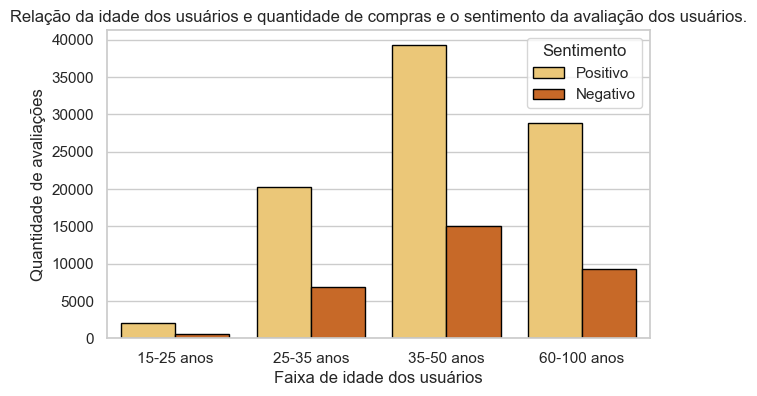

In [46]:
sns.set(style="whitegrid")
plt.figure(figsize=(7,4))
sns.countplot(x='group_age', 
              data = data,
              hue='recommend_to_a_friend',
              palette='YlOrBr',
              edgecolor = "black",
              order=['15-25 anos','25-35 anos','35-50 anos','60-100 anos'])
plt.xlabel("Faixa de idade dos usuários")
plt.ylabel("Quantidade de avaliações")
plt.title("Relação da idade dos usuários e quantidade de compras e o sentimento da avaliação dos usuários.")
plt.legend(title='Sentimento', loc='upper right', labels=['Positivo', 'Negativo'])
plt.show()

#### As Palavras mais frequentes do dataset

In [47]:
data = df.copy()
data['text'] = data['review_title'] + ' ' + data['review_text']
data['text'] = data['text'].apply(token_and_remove_sw)

In [48]:
def count_frequency(data):
    words_counts = Counter(chain.from_iterable(list(data['text'])))
    words_freq = list(sorted(words_counts.items(), key=lambda x: x[1], reverse=True))
    data_word_frequency = pd.DataFrame(words_freq,columns = ['word', 'frequency'])
    data_word_frequency = data_word_frequency.drop(index=0)
    data_word_frequency = data_word_frequency[0:10]
    return data_word_frequency

As palavras mais citadas para boas avaliações

In [49]:
count_frequency(data[data['recommend_to_a_friend']=='Yes'])

,word,frequency
1,bom,38175
2,excelente,23062
3,recomendo,22960
4,gostei,19634
5,entrega,19317
6,ótimo,19254
7,qualidade,15466
8,bem,14670
9,prazo,13127
10,chegou,12040


As palavras mais citadas para péssimas avaliações

In [50]:
count_frequency(data[data['recommend_to_a_friend']=='No'])

,word,frequency
1,recebi,9875
2,comprei,6309
3,ainda,5625
4,veio,5613
5,entrega,5173
6,nao,4998
7,americanas,4793
8,chegou,4254
9,dia,3700
10,qualidade,3697


Nuvem de palavras para as avaliações boas e ruins.

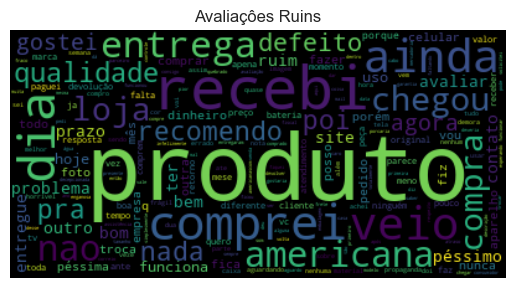

In [51]:
def wc(data,name_evaluation):
    all_word = ' '.join([text for text in data['text_sw']])
    wordcloud = WordCloud(collocations=False).generate(all_word)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(name_evaluation)
    plt.axis("off")
    plt.show()

data['text_sw'] = data['text'].map(' '.join)
wc(data[data['recommend_to_a_friend']=='No'],"Avaliaçôes Ruins")

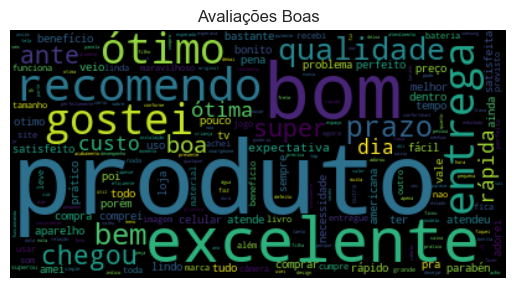

In [52]:
wc(data[data['recommend_to_a_friend']=='Yes'],"Avaliações Boas")

Analisando o tamanho das frases e relacionando com o  sentimento das avaliações.

In [69]:
data =  df.copy()
data['text'] = data['review_title'] + ' ' + data['review_text']
data['text'] = data['text'].apply(token_and_remove_sw)

def tam_sentencas(data):
    sentence_lengths = [len(tokens) for tokens in data['text']]
    return sentence_lengths

sentence_lengths_pos = tam_sentencas(data[data['recommend_to_a_friend']=='Yes'])
sentence_lengths_neg = tam_sentencas(data[data['recommend_to_a_friend']=='No'])

c:\Users\STEFA\Anaconda3\envs\apolo\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
c:\Users\STEFA\Anaconda3\envs\apolo\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing impor

Text(0.5, 1.0, 'Tamanho das sentenças')

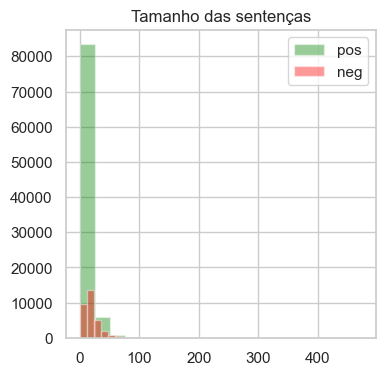

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(4,4))
ax = sns.distplot(sentence_lengths_pos, bins=18, label = 'pos', kde =False, color="green")
ax = sns.distplot(sentence_lengths_neg, bins=40, label = 'neg', kde =False, color="red")
ax.legend()
ax.set_title('Tamanho das sentenças')